In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [20]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns -> take all data
y = data.iloc[:,-1]    #target column i.e price range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
#print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


### build KNN model

In [61]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_test)
#X_test : y_test

In [71]:
print('training data accuracy: ',knnModel.score(X_train,y_train))
print('testing data accuracy: ',knnModel.score(X_test,y_test))

training data accuracy:  0.961875
testing data accuracy:  0.91


### Find the "k" by measuring accuracy

In [55]:
# knnModel = KNeighborsClassifier(n_neighbors=3)
# knnModel.fit(X_train,y_train)
# predicted = knnModel.predict(X_train)
# knnModel.score(X_test,y_test)

In [78]:
knnscore_train = []
knnscore_test = []
for k in range(1,11):
    knnModel = KNeighborsClassifier(n_neighbors=k)
    knnModel.fit(X_train,y_train)
    knnscore_train.append(knnModel.score(X_train, y_train))
    knnscore_test.append(knnModel.score(X_test,y_test))


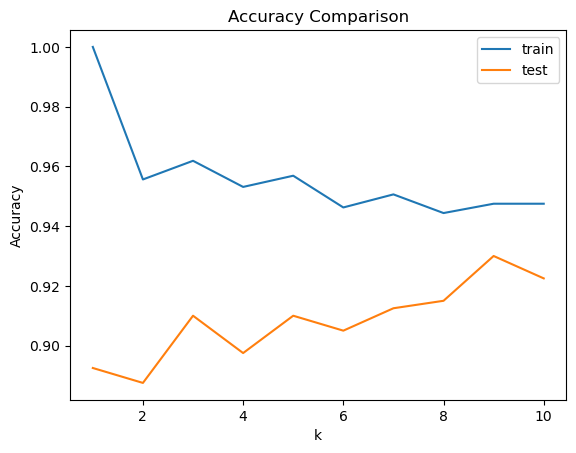

In [81]:
k = [i for i in range(1,11)]
# Plot the first line
plt.plot(k, knnscore_train, label='train')

# Plot the second line
plt.plot(k, knnscore_test, label='test')

# Add labels and title
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

Observation:
1. Maybe choose k = 9 will have a better generalization of the model


### k comparison
use only part of training data (50 data points)

In [28]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [53]:
from mlxtend.plotting import plot_decision_regions
def knn_comparison(data, k, ax):
    X = data.iloc[0:50,0:20]
    y = data.iloc[0:50,-1]
    clf = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    pca = PCA(n_components = 2)
    X_train2 = pca.fit_transform(X_train)
    #print(type(X_train2), X_train2)
    #print(type(y_train), y_train)
    clf.fit(X_train2, y_train.to_numpy())

    return plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2 ,ax=ax)


/Users/dawei_banana/miniconda3/envs/py38/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/dawei_banana/miniconda3/envs/py38/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/dawei_banana/miniconda3/envs/py38/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/dawei_banana/miniconda3/envs/py38/lib/p

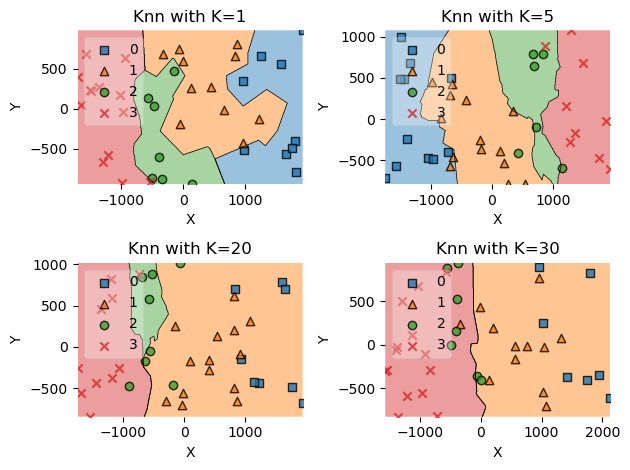

In [54]:
fig, ax = plt.subplots(2,2)
for idx, k in enumerate([1,5,20,30]):
    row = idx // 2
    col = idx % 2

    
    ax[row, col].set_xlabel('X')
    ax[row, col].set_ylabel('Y')
    ax[row, col].set_title('Knn with K=' + str(k))
    knn_comparison(data, k, ax=ax[row, col])

plt.tight_layout()
plt.show()

Observation:

1. when k = 1, the model is overfitting
2. when k = 30, the model is underfitting
3. a lower k
    * have low bias but high variance
4. a higher k 
    * averages more points in each prediction, and hence is more resilient to outliers
    * will have smoother decision boundaries which mean low variance but high bias
